# Vaccine Project
### By Alex Lee

In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, Latex, Markdown

## Data

In [3]:
statesVaccine = pd.read_csv("us_state_vaccinations.csv")

In [4]:
hesitance = pd.read_csv("Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv")

NY Times Datasets

In [5]:
states = pd.read_csv('States.csv')

In [7]:
country = pd.read_csv("Country.csv")


In [8]:
county = pd.read_csv('Counties.csv')

Datasets for future work

In [9]:
#worldProgress = pd.read_csv("World_Vaccination_Progress.csv")
#unicef = pd.read_csv("fusion_IMMUNISATION_UNICEF_1.0_all.csv")

## Data Cleaning

The states vaccine data has information for provinces and American territories, for the sake of this project, I will analyze just the 50 states on the mainlaind. In addition, to match the data in the vaccine and covid datasets, I will be taking data from the most recent overlap date, October 22, 2021. 

In [10]:
statesRecent = statesVaccine[statesVaccine['date'] == '2021-10-22'].reset_index(drop = True)
statesRecent.head(60)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-10-22,Alabama,4742444.0,7045270.0,2644229.0,44.26,96.72,2170323.0,53.93,143.69,9615.0,9226.0,1882.0,0.673
1,2021-10-22,Alaska,849541.0,1128425.0,430458.0,52.16,116.13,381595.0,58.84,154.25,2334.0,3711.0,5073.0,0.753
2,2021-10-22,American Samoa,65441.0,70650.0,35202.0,55.30,117.51,30797.0,63.21,126.87,0.0,213.0,3825.0,0.926
3,2021-10-22,Arizona,8602398.0,10471530.0,4422905.0,52.61,118.19,3829511.0,60.76,143.87,24071.0,17041.0,2341.0,0.822
4,2021-10-22,Arkansas,3168727.0,4290340.0,1734334.0,47.52,105.00,1434030.0,57.47,142.17,7374.0,5899.0,1955.0,0.739
5,2021-10-22,Bureau of Prisons,235956.0,262810.0,125970.0,NaN,NaN,119714.0,NaN,NaN,109.0,298.0,NaN,0.898
6,2021-10-22,California,52985233.0,61321935.0,29152953.0,60.68,134.10,23974163.0,73.78,155.20,116045.0,99011.0,2506.0,0.864
7,2021-10-22,Colorado,7517784.0,8747685.0,3861468.0,61.04,130.55,3515326.0,67.05,151.90,18357.0,14725.0,2557.0,0.859
8,2021-10-22,Connecticut,5276862.0,5959195.0,2786425.0,70.25,148.01,2504611.0,78.15,167.14,11444.0,10014.0,2809.0,0.885
9,2021-10-22,Delaware,1272284.0,1629445.0,665727.0,59.39,130.66,578337.0,68.37,167.33,3474.0,3019.0,3100.0,0.781


In [11]:
statesRecent['location'].replace({'New York State': 'New York'}, inplace = True)

In [12]:
statesRecent2 = states[states['date'] == '2021-10-22']
statesRecent2 = statesRecent2[['state', 'cases', 'deaths']].reset_index(drop = True)
statesRecent2

,state,cases,deaths
0,Alabama,818652,15378
1,Alaska,132393,680
2,American Samoa,1,0
3,Arizona,1145196,20826
4,Arkansas,509559,8255
5,California,4867059,71504
6,Colorado,724074,8202
7,Connecticut,400226,8739
8,Delaware,141717,2045
9,District of Columbia,63588,1186


In [13]:
stateData = statesRecent2.merge(statesRecent, how = 'inner', left_on = 'state', right_on = 'location')

In [14]:
stateData = stateData.drop('location', axis = 1)

In [15]:
stateData

,state,cases,deaths,date,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,Alabama,818652,15378,2021-10-22,4742444.0,7045270.0,2644229.0,44.26,96.72,2170323.0,53.93,143.69,9615.0,9226.0,1882.0,0.673
1,Alaska,132393,680,2021-10-22,849541.0,1128425.0,430458.0,52.16,116.13,381595.0,58.84,154.25,2334.0,3711.0,5073.0,0.753
2,American Samoa,1,0,2021-10-22,65441.0,70650.0,35202.0,55.30,117.51,30797.0,63.21,126.87,0.0,213.0,3825.0,0.926
3,Arizona,1145196,20826,2021-10-22,8602398.0,10471530.0,4422905.0,52.61,118.19,3829511.0,60.76,143.87,24071.0,17041.0,2341.0,0.822
4,Arkansas,509559,8255,2021-10-22,3168727.0,4290340.0,1734334.0,47.52,105.00,1434030.0,57.47,142.17,7374.0,5899.0,1955.0,0.739
5,California,4867059,71504,2021-10-22,52985233.0,61321935.0,29152953.0,60.68,134.10,23974163.0,73.78,155.20,116045.0,99011.0,2506.0,0.864
6,Colorado,724074,8202,2021-10-22,7517784.0,8747685.0,3861468.0,61.04,130.55,3515326.0,67.05,151.90,18357.0,14725.0,2557.0,0.859
7,Connecticut,400226,8739,2021-10-22,5276862.0,5959195.0,2786425.0,70.25,148.01,2504611.0,78.15,167.14,11444.0,10014.0,2809.0,0.885
8,Delaware,141717,2045,2021-10-22,1272284.0,1629445.0,665727.0,59.39,130.66,578337.0,68.37,167.33,3474.0,3019.0,3100.0,0.781
9,District of Columbia,63588,1186,2021-10-22,1045370.0,1282635.0,517180.0,61.85,148.12,436533.0,73.28,181.74,4627.0,2222.0,3148.0,0.815


In [16]:
stateData.drop([2, 12, 37, 42, 50], axis = 0, inplace = True)

In [192]:
stateData = stateData.reset_index().drop(['index'], axis = 1)

Converting the data set to a geopandas dataframe in order to make geographical plots. 

In [200]:
from geopandas import GeoSeries, GeoDataFrame
stateGeoCases = gpd.GeoDataFrame(stateData)

In [201]:
stateGeoCases

,state,cases,deaths,date,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,Alabama,818652,15378,2021-10-22,4742444.0,7045270.0,2644229.0,44.26,96.72,2170323.0,53.93,143.69,9615.0,9226.0,1882.0,0.673
1,Alaska,132393,680,2021-10-22,849541.0,1128425.0,430458.0,52.16,116.13,381595.0,58.84,154.25,2334.0,3711.0,5073.0,0.753
2,Arizona,1145196,20826,2021-10-22,8602398.0,10471530.0,4422905.0,52.61,118.19,3829511.0,60.76,143.87,24071.0,17041.0,2341.0,0.822
3,Arkansas,509559,8255,2021-10-22,3168727.0,4290340.0,1734334.0,47.52,105.00,1434030.0,57.47,142.17,7374.0,5899.0,1955.0,0.739
4,California,4867059,71504,2021-10-22,52985233.0,61321935.0,29152953.0,60.68,134.10,23974163.0,73.78,155.20,116045.0,99011.0,2506.0,0.864
5,Colorado,724074,8202,2021-10-22,7517784.0,8747685.0,3861468.0,61.04,130.55,3515326.0,67.05,151.90,18357.0,14725.0,2557.0,0.859
6,Connecticut,400226,8739,2021-10-22,5276862.0,5959195.0,2786425.0,70.25,148.01,2504611.0,78.15,167.14,11444.0,10014.0,2809.0,0.885
7,Delaware,141717,2045,2021-10-22,1272284.0,1629445.0,665727.0,59.39,130.66,578337.0,68.37,167.33,3474.0,3019.0,3100.0,0.781
8,District of Columbia,63588,1186,2021-10-22,1045370.0,1282635.0,517180.0,61.85,148.12,436533.0,73.28,181.74,4627.0,2222.0,3148.0,0.815
9,Florida,3635126,58803,2021-10-22,27997140.0,34507895.0,14724066.0,59.23,130.35,12721909.0,68.56,160.67,99890.0,48650.0,2265.0,0.811


In [202]:
locs = gpd.read_file("cb_2018_us_state_500k/cb_2018_us_state_500k.shp")

In [203]:
locs = locs[['NAME', 'geometry']]

In [204]:
locs = locs.merge(stateGeoCases, how = 'inner', left_on = 'NAME', right_on = 'state')
locs.drop('state', axis = 1, inplace = True)

For graphical organization purposes, Alaska and Hawaii will be plotted separately.

In [206]:
hawaii = locs.iloc[[39]]
alaska = locs.iloc[[26]]
locs.drop([26, 39], axis = 0, inplace = True)

## Visualizations and Data Exploration

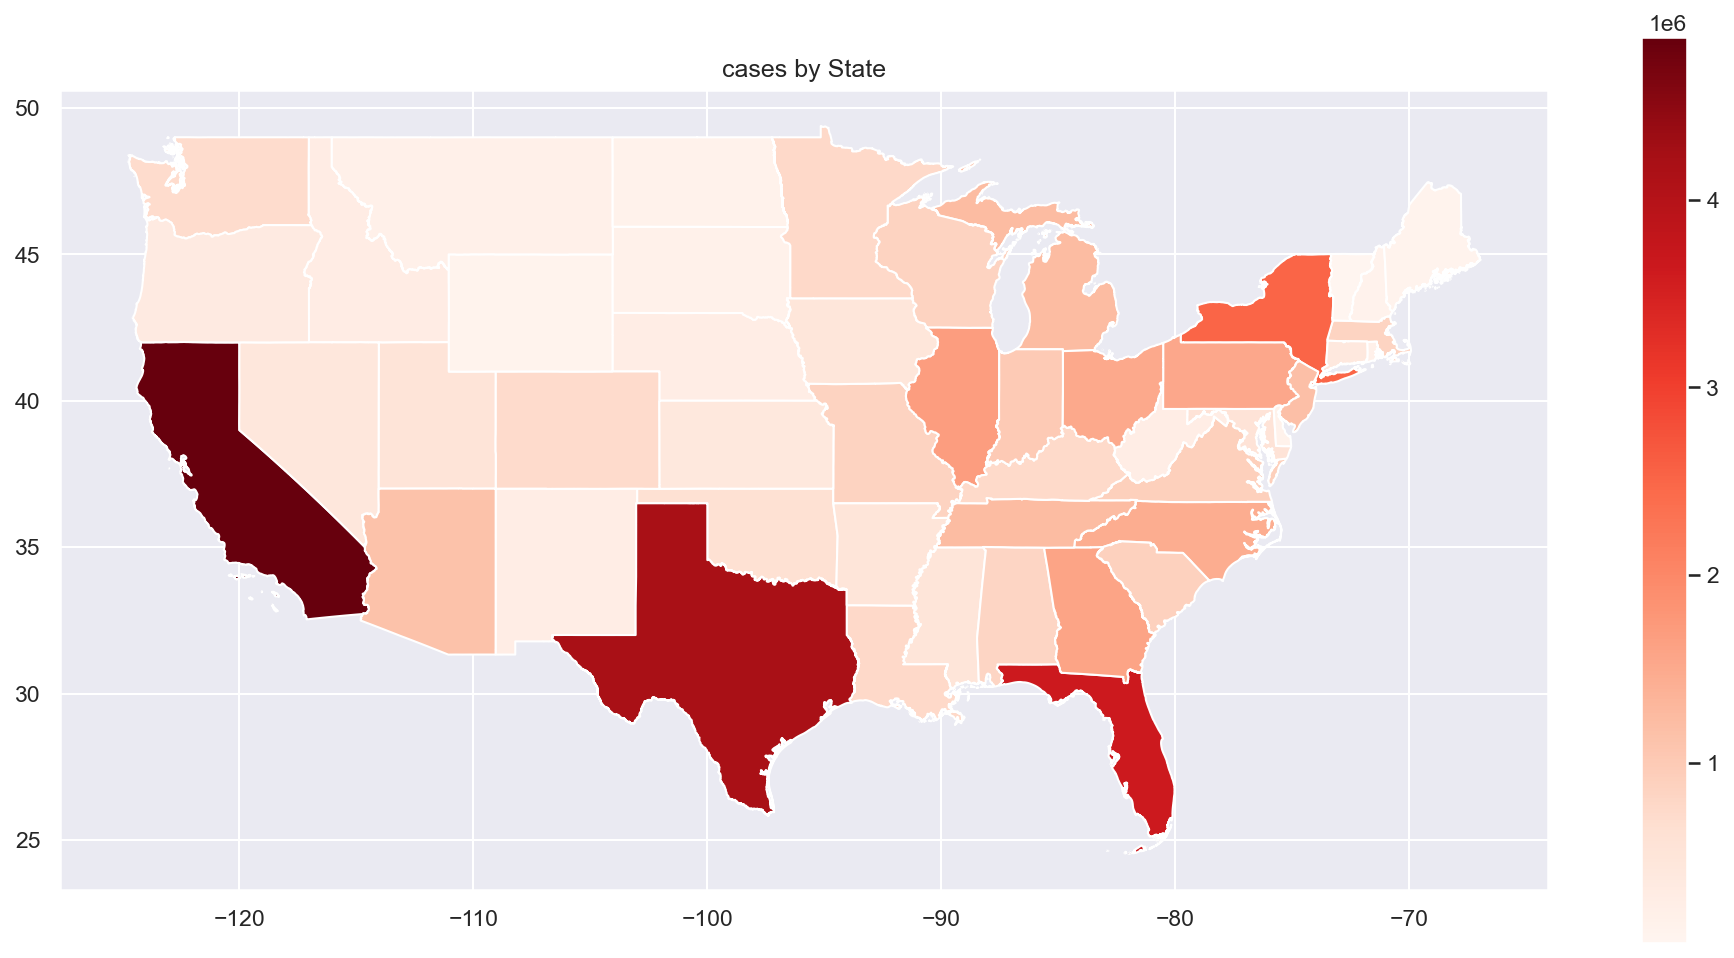

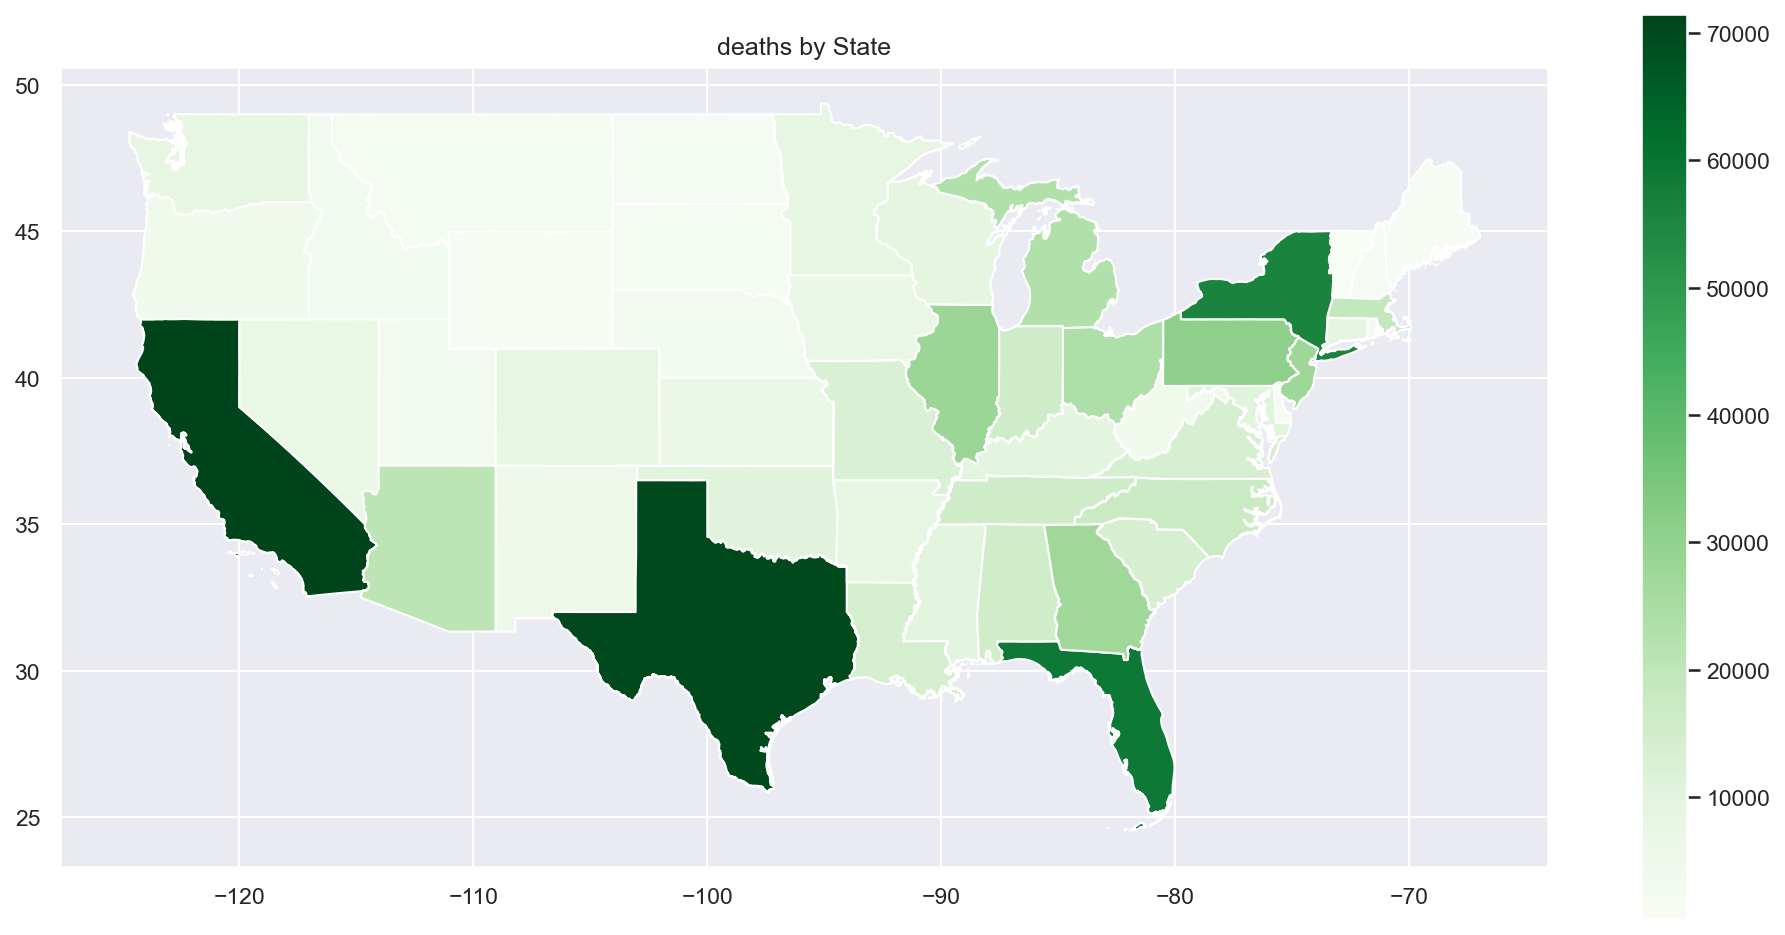

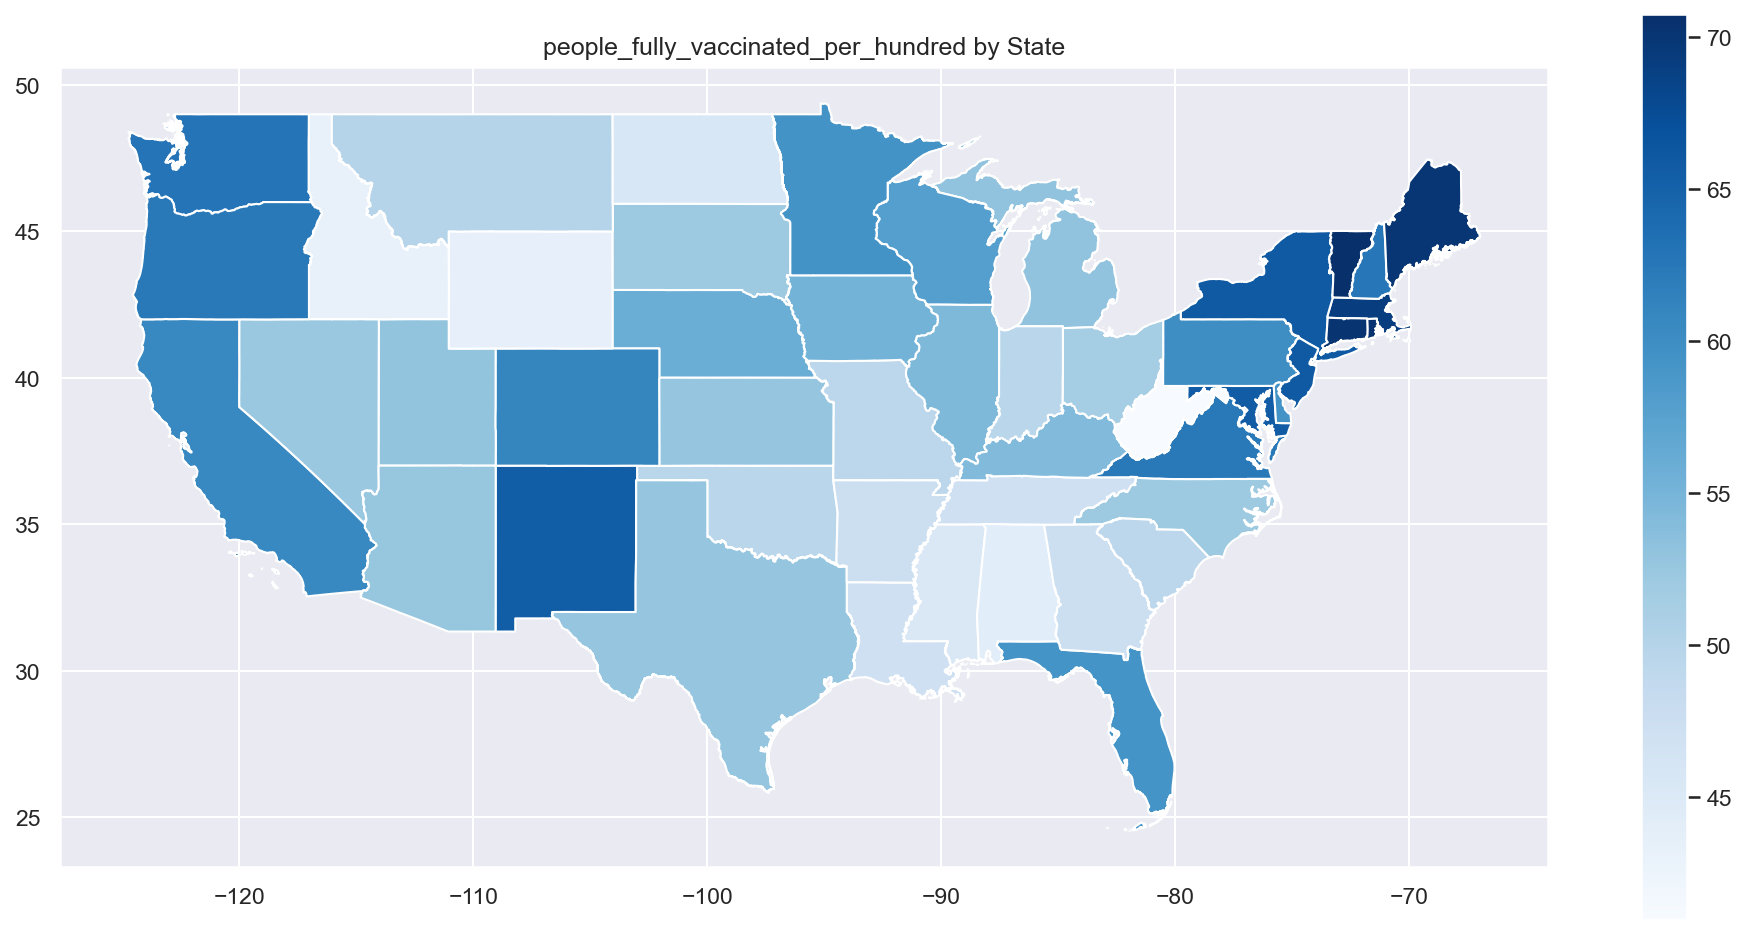

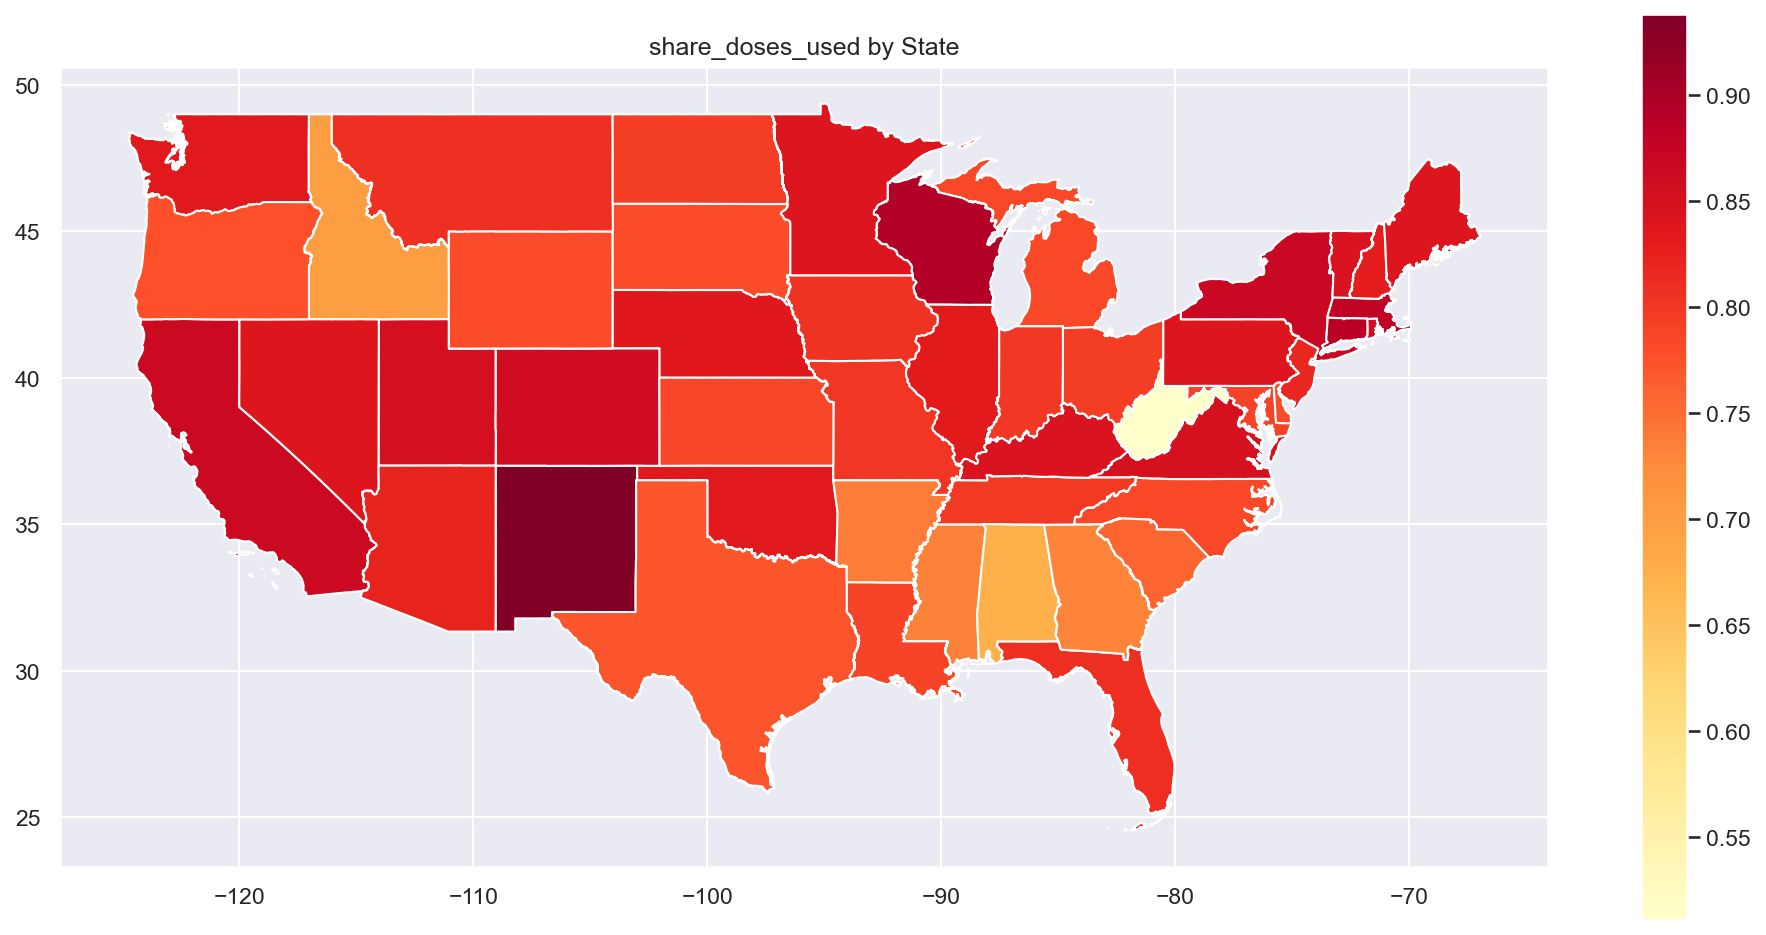

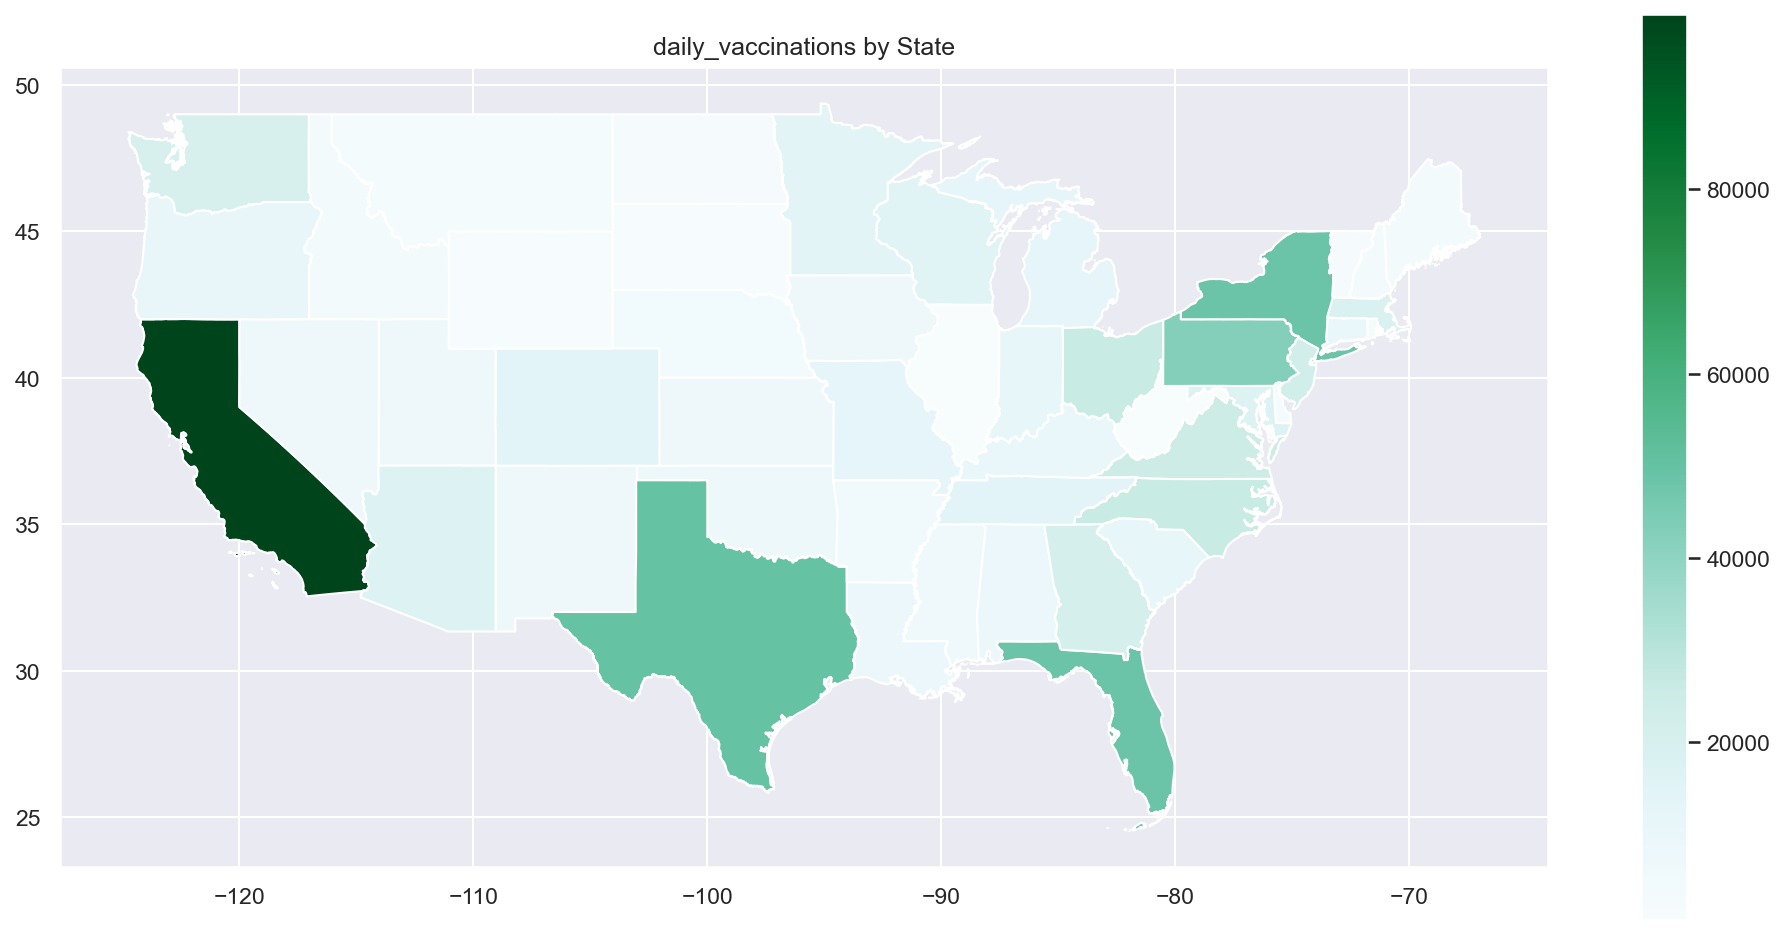

In [292]:
cols = locs[['cases', 'deaths', 'people_fully_vaccinated_per_hundred', 'share_doses_used', 'daily_vaccinations']]
colors = ['Reds', 'Greens', 'Blues', 'YlOrRd', 'BuGn']
index = 0
for col in cols.columns:
    fig, ax = plt.subplots(1, 1)
    locs.plot(column = col, cmap = colors[index], ax=ax, legend=True)
    index += 1
    plt.title(col + ' by State'); 

## California
To gain a better understanding of the dataset and to dive deeper into analysis of covid cases and vaccine distribution, I will analyze California. I am choosing California as it has a large population, a high number of covid cases and a moderately high vaccine distribution. 

In [212]:
ca_locs = locs[locs['NAME'] == 'California'].reset_index(drop = True)
caVaccineTime = statesVaccine[statesVaccine['location'] == 'California'].reset_index(drop = True)
caCovidTime = states[states['state'] == 'California'].reset_index(drop = True)

In [213]:
caCovidTime

,date,state,fips,cases,deaths
0,2020-01-25,California,6,1,0
1,2020-01-26,California,6,2,0
2,2020-01-27,California,6,2,0
3,2020-01-28,California,6,2,0
4,2020-01-29,California,6,2,0
...,...,...,...,...,...
632,2021-10-18,California,6,4845060,70981
633,2021-10-19,California,6,4849225,71046
634,2021-10-20,California,6,4853370,71192
635,2021-10-21,California,6,4860797,71369


In [290]:
caVaccineTime

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
1,2021-01-13,California,891489.0,3435650.0,744545.0,0.34,2.26,133689.0,1.88,8.70,75188.0,75188.0,1903.0,0.259
3,2021-01-15,California,1072959.0,3548575.0,865387.0,0.52,2.72,204374.0,2.19,8.98,97666.0,85553.0,2165.0,0.302
8,2021-01-20,California,1532329.0,4169450.0,1255311.0,0.69,3.88,273276.0,3.18,10.55,71899.0,91549.0,2317.0,0.368
9,2021-01-21,California,1633875.0,4379500.0,1335886.0,0.74,4.14,293834.0,3.38,11.08,101546.0,94083.0,2381.0,0.373
10,2021-01-22,California,1803679.0,4714625.0,1477195.0,0.81,4.56,321839.0,3.74,11.93,169804.0,104389.0,2642.0,0.383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2021-10-21,California,52869188.0,61020085.0,29081847.0,60.55,133.80,23923585.0,73.60,154.43,113049.0,98822.0,2501.0,0.866
283,2021-10-22,California,52985233.0,61321935.0,29152953.0,60.68,134.10,23974163.0,73.78,155.20,116045.0,99011.0,2506.0,0.864
284,2021-10-23,California,53075050.0,61500045.0,29182133.0,60.73,134.33,23996305.0,73.86,155.65,89817.0,93168.0,2358.0,0.863
285,2021-10-24,California,53203847.0,61499605.0,29218410.0,60.81,134.65,24027100.0,73.95,155.65,128797.0,97080.0,2457.0,0.865


Because the dataset provided gives the total number of cases and deaths (as a cummulative number), I added two new columns to represent the daily cases and deaths. This will help to better analyze the effect of vaccine administration in California. 

In [221]:
caCovidTime['Daily Deaths'] = caCovidTime['deaths'].diff().fillna(0)
caCovidTime['Daily Cases'] = caCovidTime['cases'].diff().fillna(0)

Because of errors and occassional poor data collection, I ommitted some of the outliers for my analysis. 

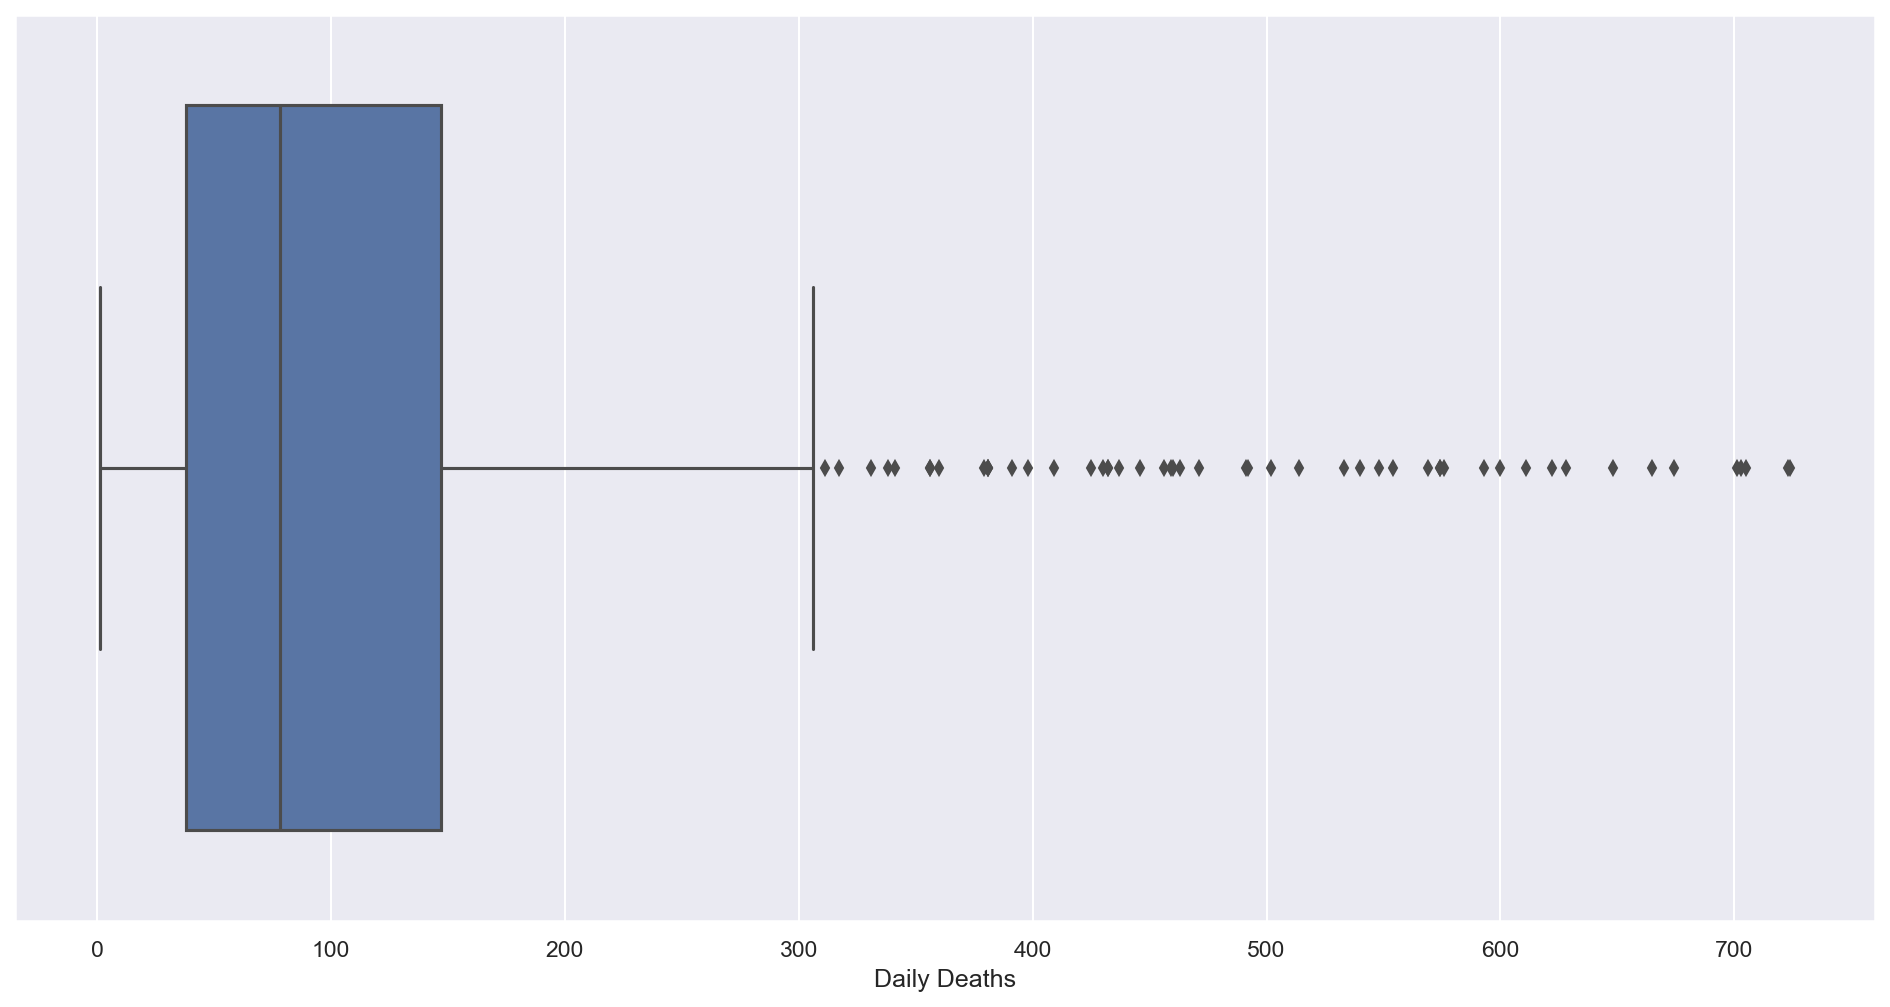

In [233]:
sns.boxplot(caCovidTime['Daily Deaths']);

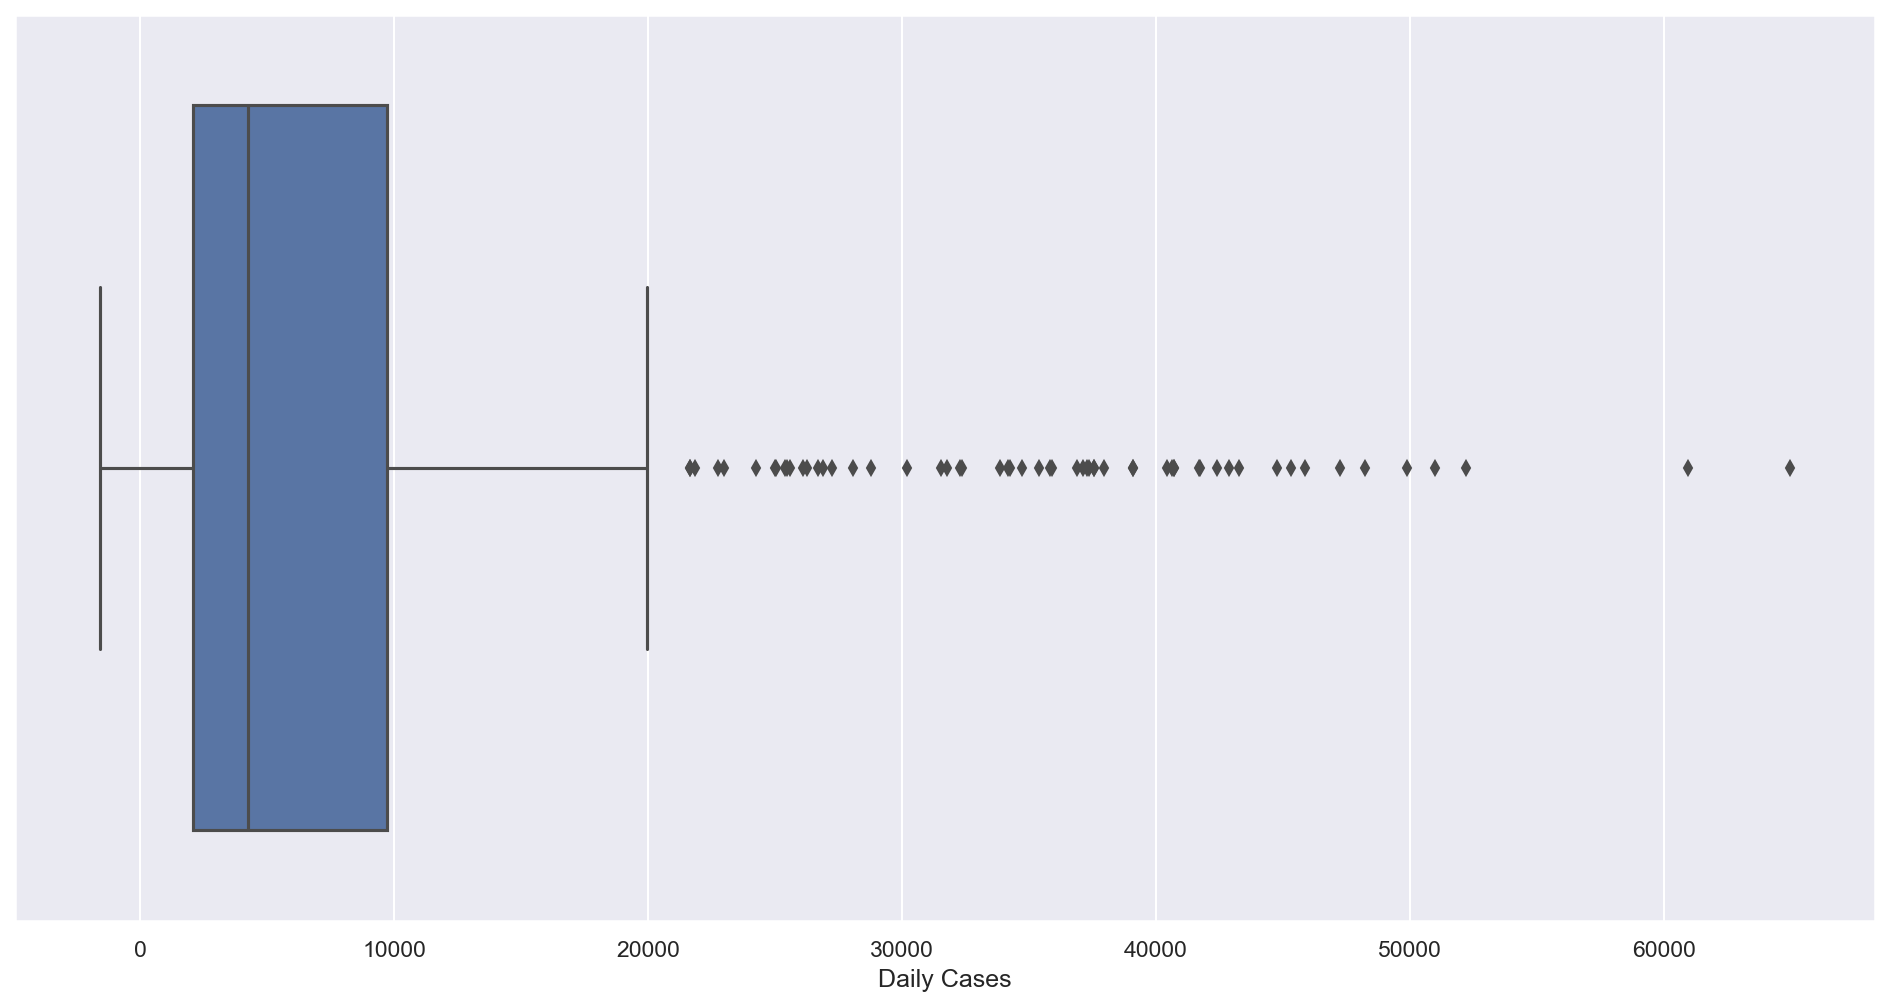

In [234]:
sns.boxplot(caCovidTime['Daily Cases']);

In [235]:
caCovidTime = caCovidTime[(caCovidTime['Daily Deaths'] > 0) & (caCovidTime['Daily Deaths'] < 800)]
caCovidTime = caCovidTime[caCovidTime['Daily Cases'] > 0]

In [222]:
print('Before imputation:')
print(caVaccineTime.isnull().sum())

Before imputation:
date                                    0
location                                0
total_vaccinations                     10
total_distributed                      10
people_vaccinated                      10
people_fully_vaccinated_per_hundred    11
total_vaccinations_per_hundred         10
people_fully_vaccinated                11
people_vaccinated_per_hundred          10
distributed_per_hundred                10
daily_vaccinations_raw                 17
daily_vaccinations                      1
daily_vaccinations_per_million          1
share_doses_used                       10
dtype: int64


Removing the null values from the vaccine data, this is likely due to errors in reporting for some days or the data not being available. 

In [223]:
caVaccineTime.dropna(axis = 0, inplace = True)

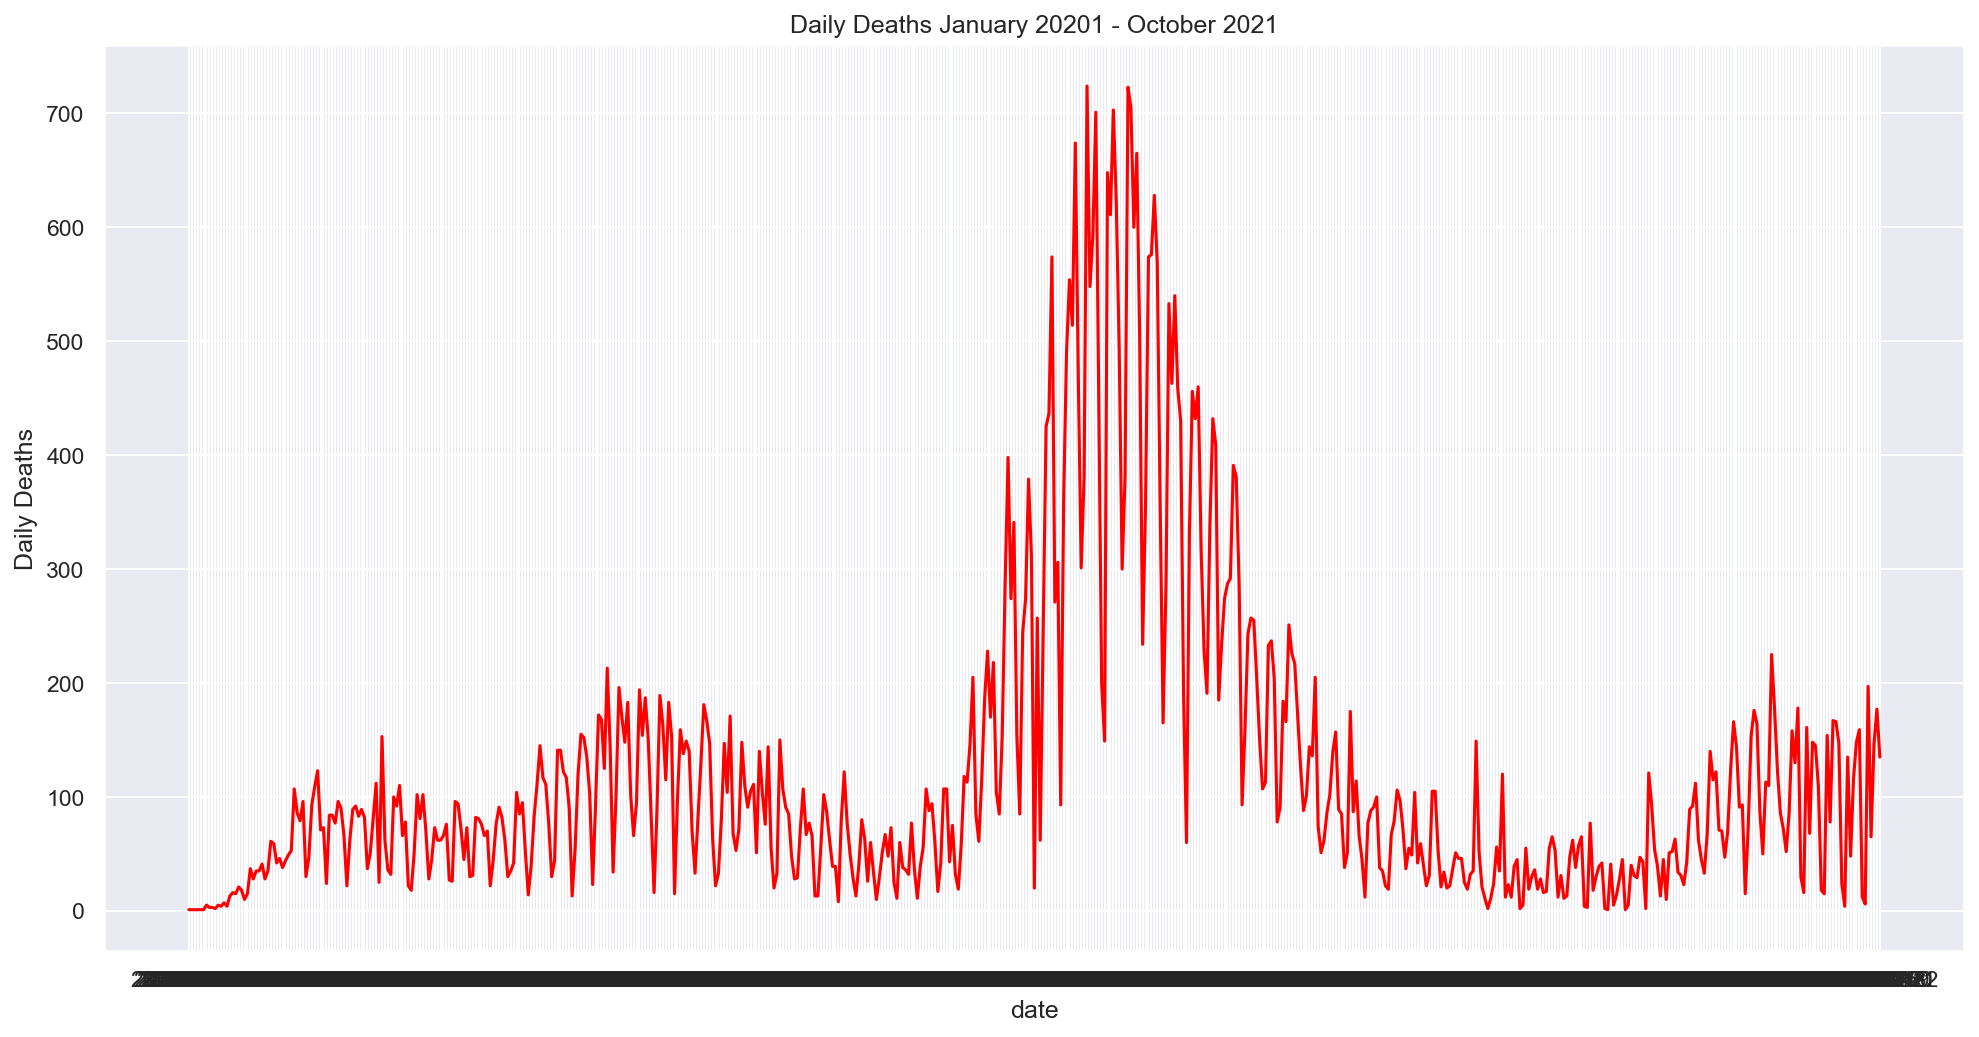

In [249]:
sns.lineplot(x = 'date', y = 'Daily Deaths', data = caCovidTime, color = "red")
plt.title('Daily Deaths January 20201 - October 2021');

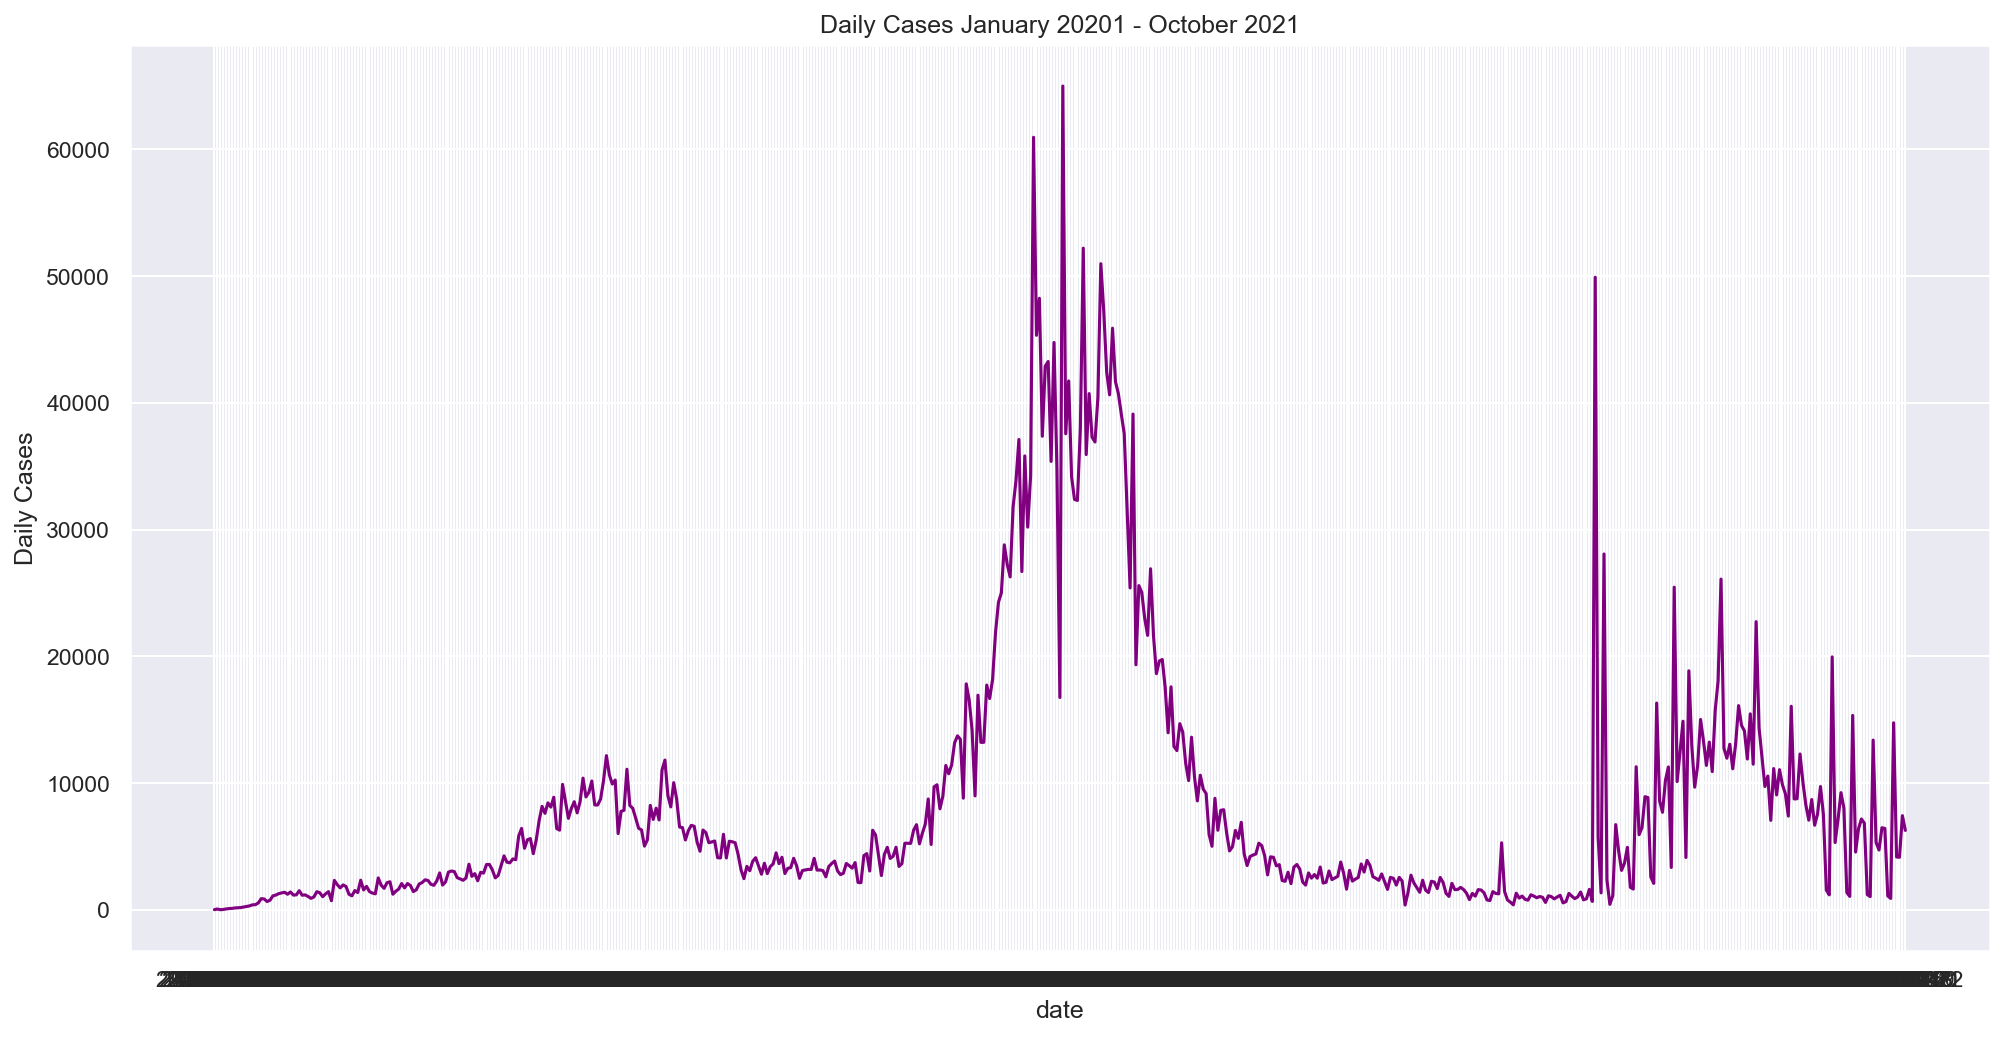

In [250]:
sns.lineplot(x = 'date', y = 'Daily Cases', data = caCovidTime, color = "purple")
plt.title('Daily Cases January 20201 - October 2021');

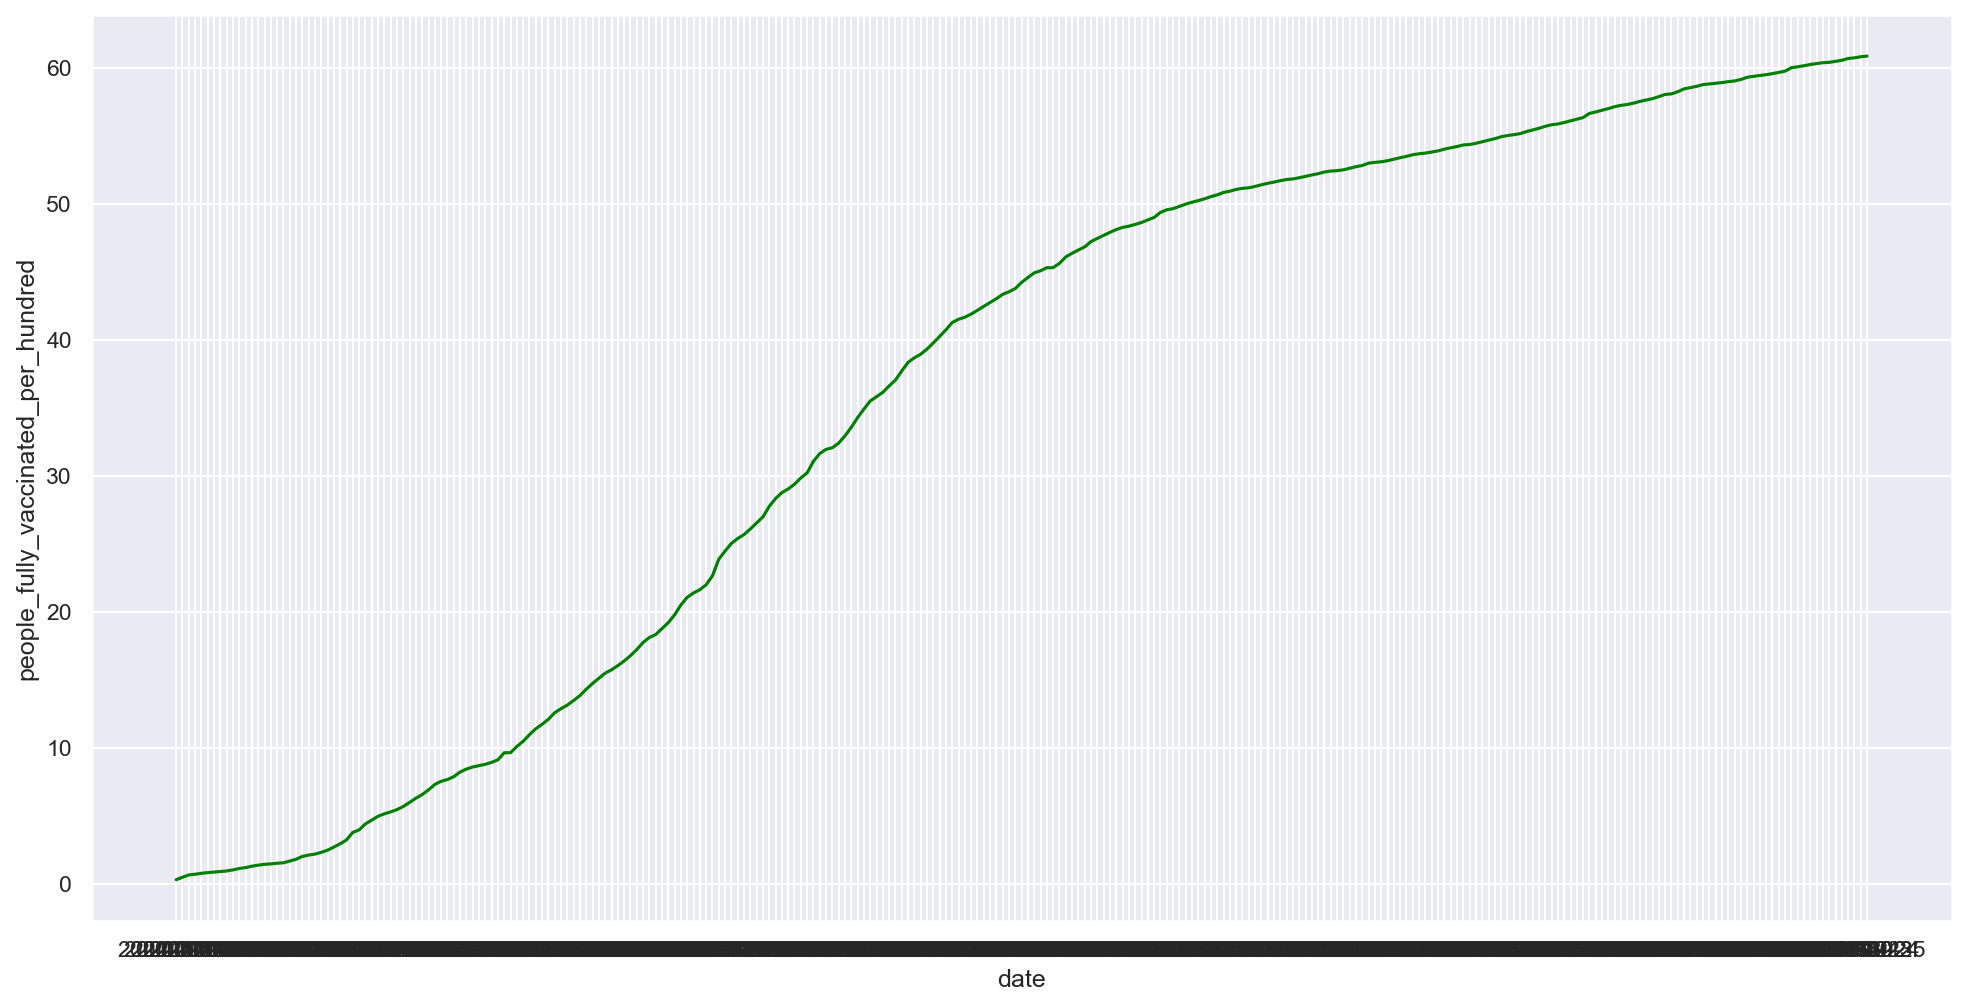

In [248]:
sns.lineplot(x = 'date', y = 'people_fully_vaccinated_per_hundred', data = caVaccineTime, color = 'green');

Observing the following graphs above, we can see that COVID cases and deaths follow a near identical pattern, with the deaths curve having a slight delay over the cases as expected due to a delay between diagnosis and progression of the disease. Overall, we see the vaccine rollout in California increase greatly during the summer months, in which there is a sharp decline in both cases and deaths. As you can see on the curves, as CA approached around 50% fully vaccinated, the number of COVID-19 cases and deaths significantly declined. Although vaccine rates continued to rise (at a slower rate), the cases saw a sharper increase in cases, likely due to the Delta Variant. It is interesting to note that the deaths did not increase as sharply as the cases, likely showing the effect of vaccines on preventing deaths in vaccinated individuals. 

Because most of this general information is widely reported in the news and known to the public, I will now attempt to quantify and further analyze the effect of vaccine distribution on COVID cases and deaths. 

In [288]:
CA_joined = caCovidTime.merge(caVaccineTime, how = 'inner', left_on = 'date', right_on = 'date')

In [252]:
from sklearn.linear_model import LinearRegression
x = CA_joined[['daily_vaccinations']]
y = CA_joined[['Daily Cases']]
model = LinearRegression().fit(x, y)

In [261]:
model.coef_[0][0]

-0.028052896341403503

In [262]:
1/model.coef_[0][0]

-35.64694311168475

In [259]:
model.intercept_[0]

12308.16200674131

Based on simple linear regression model of daily_vaccinations and its effect on daily cases, the daily cases is expected to decrease by .028 cases per individual vaccinated. In other words, for roughly every additional 36 invidividuals that are vaccinated, the daily cases is expected to decrease by 1. The intercept term represents th daily cases when there are no individuals vaccinated in a day; however, this term does not have as much statistical significance as there was almost a year of COVID without vaccines being administered. 

Continuing with a simple regression model, I will use regression to predict the vaccination rate that CA would theoretically need to achieve 1,000 daily cases (The number pre-delta variant). Instead of using daily vaccinations for this, I will use the percent of the population vaccination (Note: this data set contains data for at least one vaccine per 100 and fully vaccinated per 100; I will use the former for my analysis as one dose has been shown to have a positive effect). This is because the number of vaccinations administered will decrease as more and more of the population is vaccinated. Just to further prove why using daily vaccinations in this model would be incorret: CA would need to increase the daily vaccinations from 100k a day to 400k a day. This is not realistic. 

In [270]:
#Not realistic
model.predict([[400000]])

array([[1087.00347018]])

In [271]:
x = CA_joined[['people_vaccinated_per_hundred']]
y = CA_joined[['Daily Cases']]
model = LinearRegression().fit(x, y)

Every 1% increase in population vaccinated is expected to decrease daily COVID cases by around 48. Currently, around 73% of Californians have received one dose and around 60% have been fully vaccinated. 

In [272]:
model.coef_[0][0]

-48.261897524127995

In [274]:
current = model.predict([[74]])[0][0]

In [279]:
potential = model.predict([[90]])[0][0]

In [282]:
current - potential

772.1903603860474

According to our linear regression model, increasing the vaccination percentage in California to 90% would only decrease daily COVID cases by roughly 800 cases (This would bring down to around 4000, still far away from pre-delta variant numbers). For context, the highest administered vaccine in the USA is Polio with roughly 93% of children receiving this vaccine. MMR and Hepatitis B and Chicken Pox vaccines are all around 90%, but the vast majority of vaccines are admitted to a much lower percentage of the population. This provides a tough task for CA in the fight against COVID-19 as vaccine rates for the COVID vaccine are in fact higher than many common vaccines, including the flu shot. 

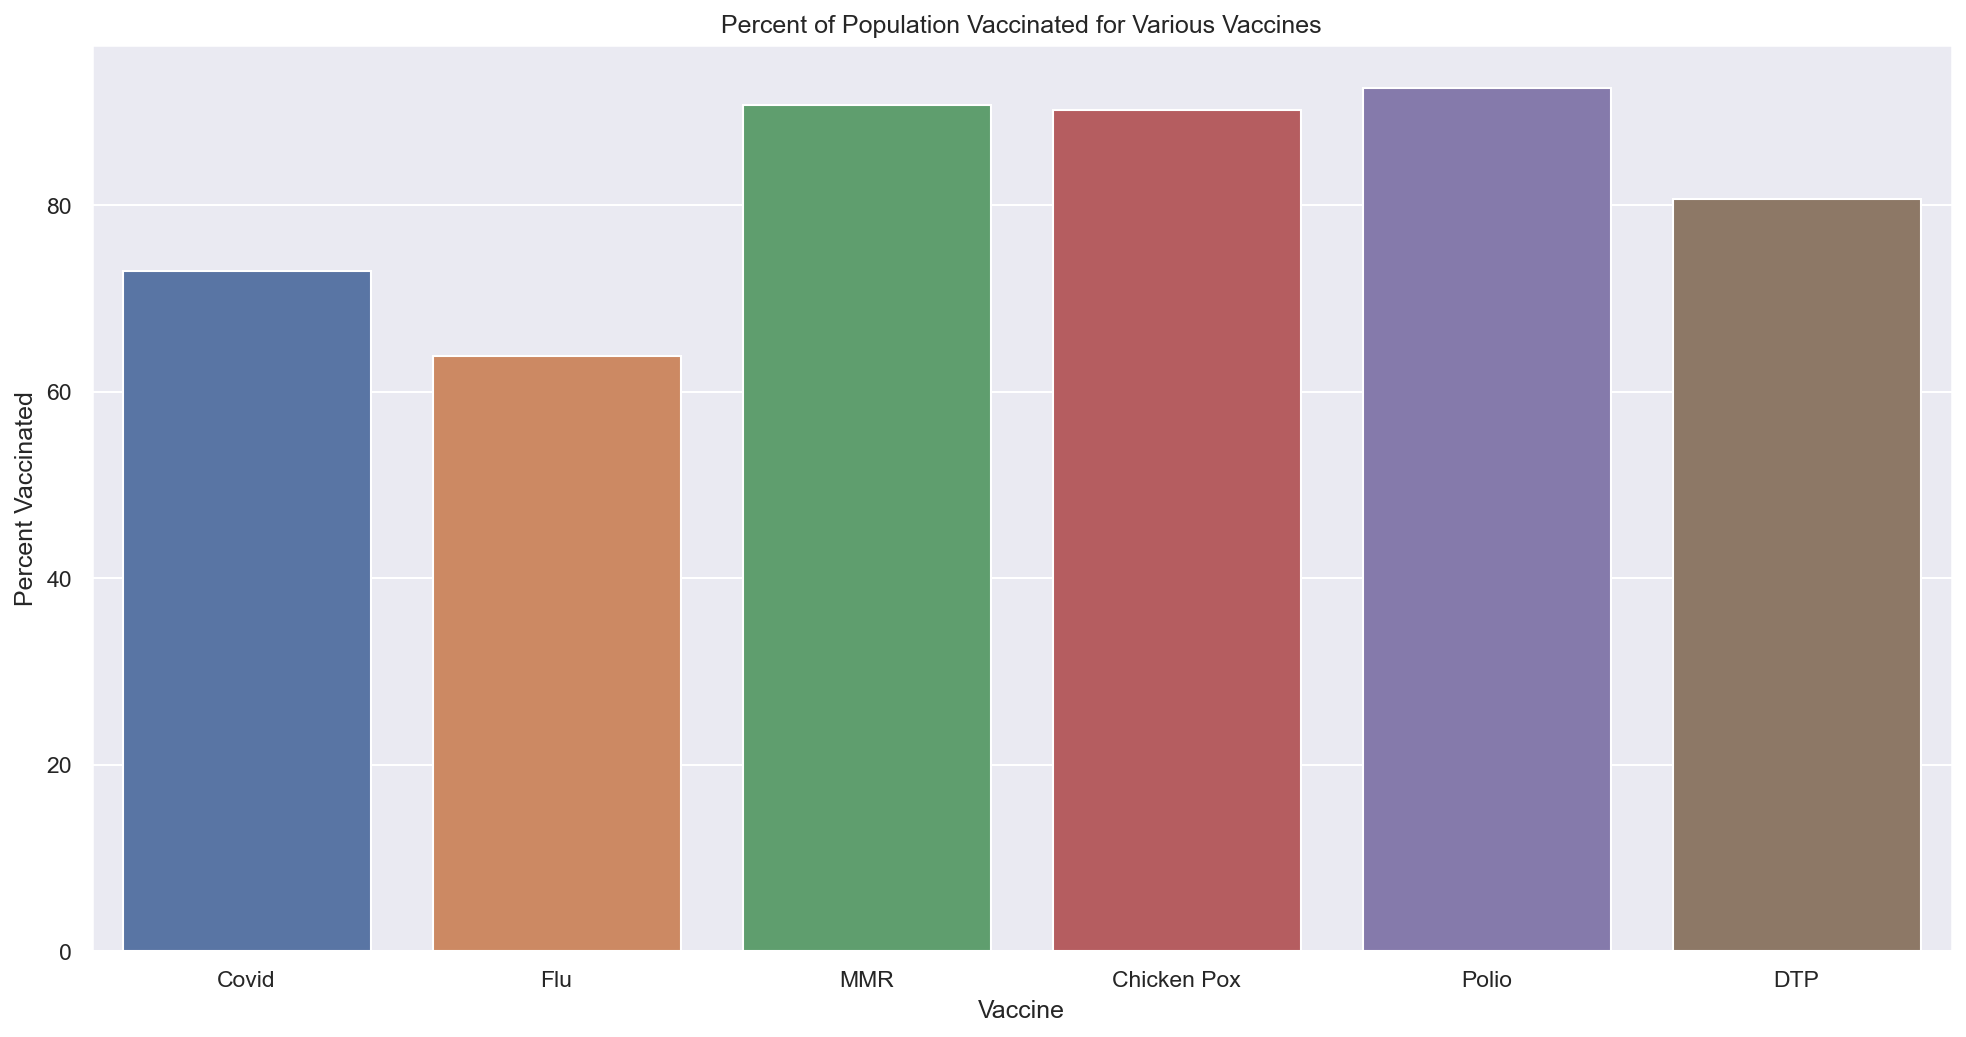

In [287]:
d ={'Vaccine': ['Covid', 'Flu', 'MMR', 'Chicken Pox', 'Polio', 'DTP'], 'Percent Vaccinated': [73, 63.8, 90.8, 90.2, 92.6, 80.7]}
vaccines = pd.DataFrame(data = d)
sns.barplot(x = 'Vaccine', y = 'Percent Vaccinated', data = vaccines)
plt.title('Percent of Population Vaccinated for Various Vaccines');

Now, I will analyxe a multiple regression model and use OLS with L2 regularization to observe the effect on various vaccination factors on daily deaths in California. 

In [289]:
def linear_model(thetas, X):
    return np.dot(X, thetas)
from scipy.optimize import minimize
##OLS
def l2(y, y_hat):
    return (y - y_hat)**2
def minimize_average_loss(loss_function, model, X, y):
    return minimize(lambda theta: np.mean(loss_function(y, model(theta,X))), x0= np.ones(X.shape[1]))['x']

In [295]:
features = CA_joined[['people_vaccinated', 'people_fully_vaccinated_per_hundred', 'people_fully_vaccinated']]
coeffs = minimize_average_loss(l2, linear_model, features, CA_joined['Daily Deaths'])
coeffs

array([ 4.26905825e-05,  3.82078202e+04, -9.67489589e-02])

As seen above, the number of fully vaccinated people had the largest effect on the number of daily deaths. 

## California

California is already at a high threshold of COVID vaccinations, and historically, the highest vaccine rate is Polio at 92.6%. It is also interesting to note that the Polio vaccine is given to the. majority of newborn babies and not adult populations, so it is thus easier to attain a higher rate of vaccination. 